In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img



### 이미지 데이터 generator
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
- 다양한 옵션들

    ```py
    tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=0, #***
        width_shift_range=0.0, #***
        height_shift_range=0.0, #***
        brightness_range=None, #***
        shear_range=0.0,
        zoom_range=0.0, #***
        channel_shift_range=0.0,
        fill_mode='nearest',
        cval=0.0,
        horizontal_flip=False, #***
        vertical_flip=False, #***
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0,
        interpolation_order=1,
        dtype=None
    )
    ```

In [26]:
# 데이터 증강을 위한 설정
datagen = ImageDataGenerator(
    rotation_range=40, # 이미지 회전, 40: 0~40도 사이의 각도로 랜덤 회전
    width_shift_range=0.2, # 수평 이동 0.2: (전체 너비의)20% 범위 내에서 랜덤 이동
    height_shift_range=0.2, # 수직 이동 0.2: 20% 범위 내에서 랜덤 이동
    zoom_range=0.2, # 확대/축소 0.2: 1 ± 0.2,(80%에서 120%) 사이에서 이미지를 랜덤하게 확대 or 축소
    horizontal_flip=True, # 이미지를 수평 방향으로 뒤집기
    fill_mode='nearest' # 이미지 변형 후 생기는 공백 처리, 'nearest':가장 가까운 픽셀 값으로 채움
)

In [27]:
# 이미지 로드 (예시로 하나의 이미지를 사용)
img = load_img('../data/data_mw/woman/w_67.jpg')  # 이미지 경로
x = img_to_array(img)  # 이미지를 배열로 변환
x = x.reshape((1,) + x.shape)  # (1, height, width, channels) # 배치 차원 추가


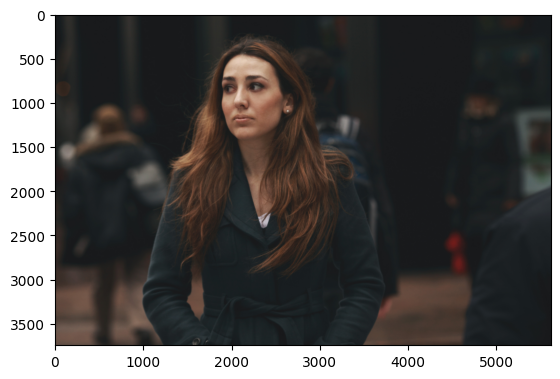

In [28]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
# 증강 이미지 생성, 확인
fig, ax = plt.subplots(5,5,figsize=(20,20))
ax = ax.flatten()
i = 0
for batch in datagen.flow(x, batch_size=1): # flow : x 이미지 데이터로부터 배치 생성, 데이터 변형(transform) 수행
                                            #  batch_size=1 : 한 번에 하나의 이미지 생성
    ax[i].figure(i) # '그림창' 생성. i '그림창' 고유 index
    imgplot = plt.imshow(array_to_img(batch[0])) # batch[0] : 생성된 배치에서 첫 번째 이미지
       # array_to_img: array 형태의  이미지 데이터(batch[0])를 PIL 이미지 객체로 변환
       # imshow : 이미지 표시
    i += 1
    if i % 10 == 0:
        break
# plt.show()


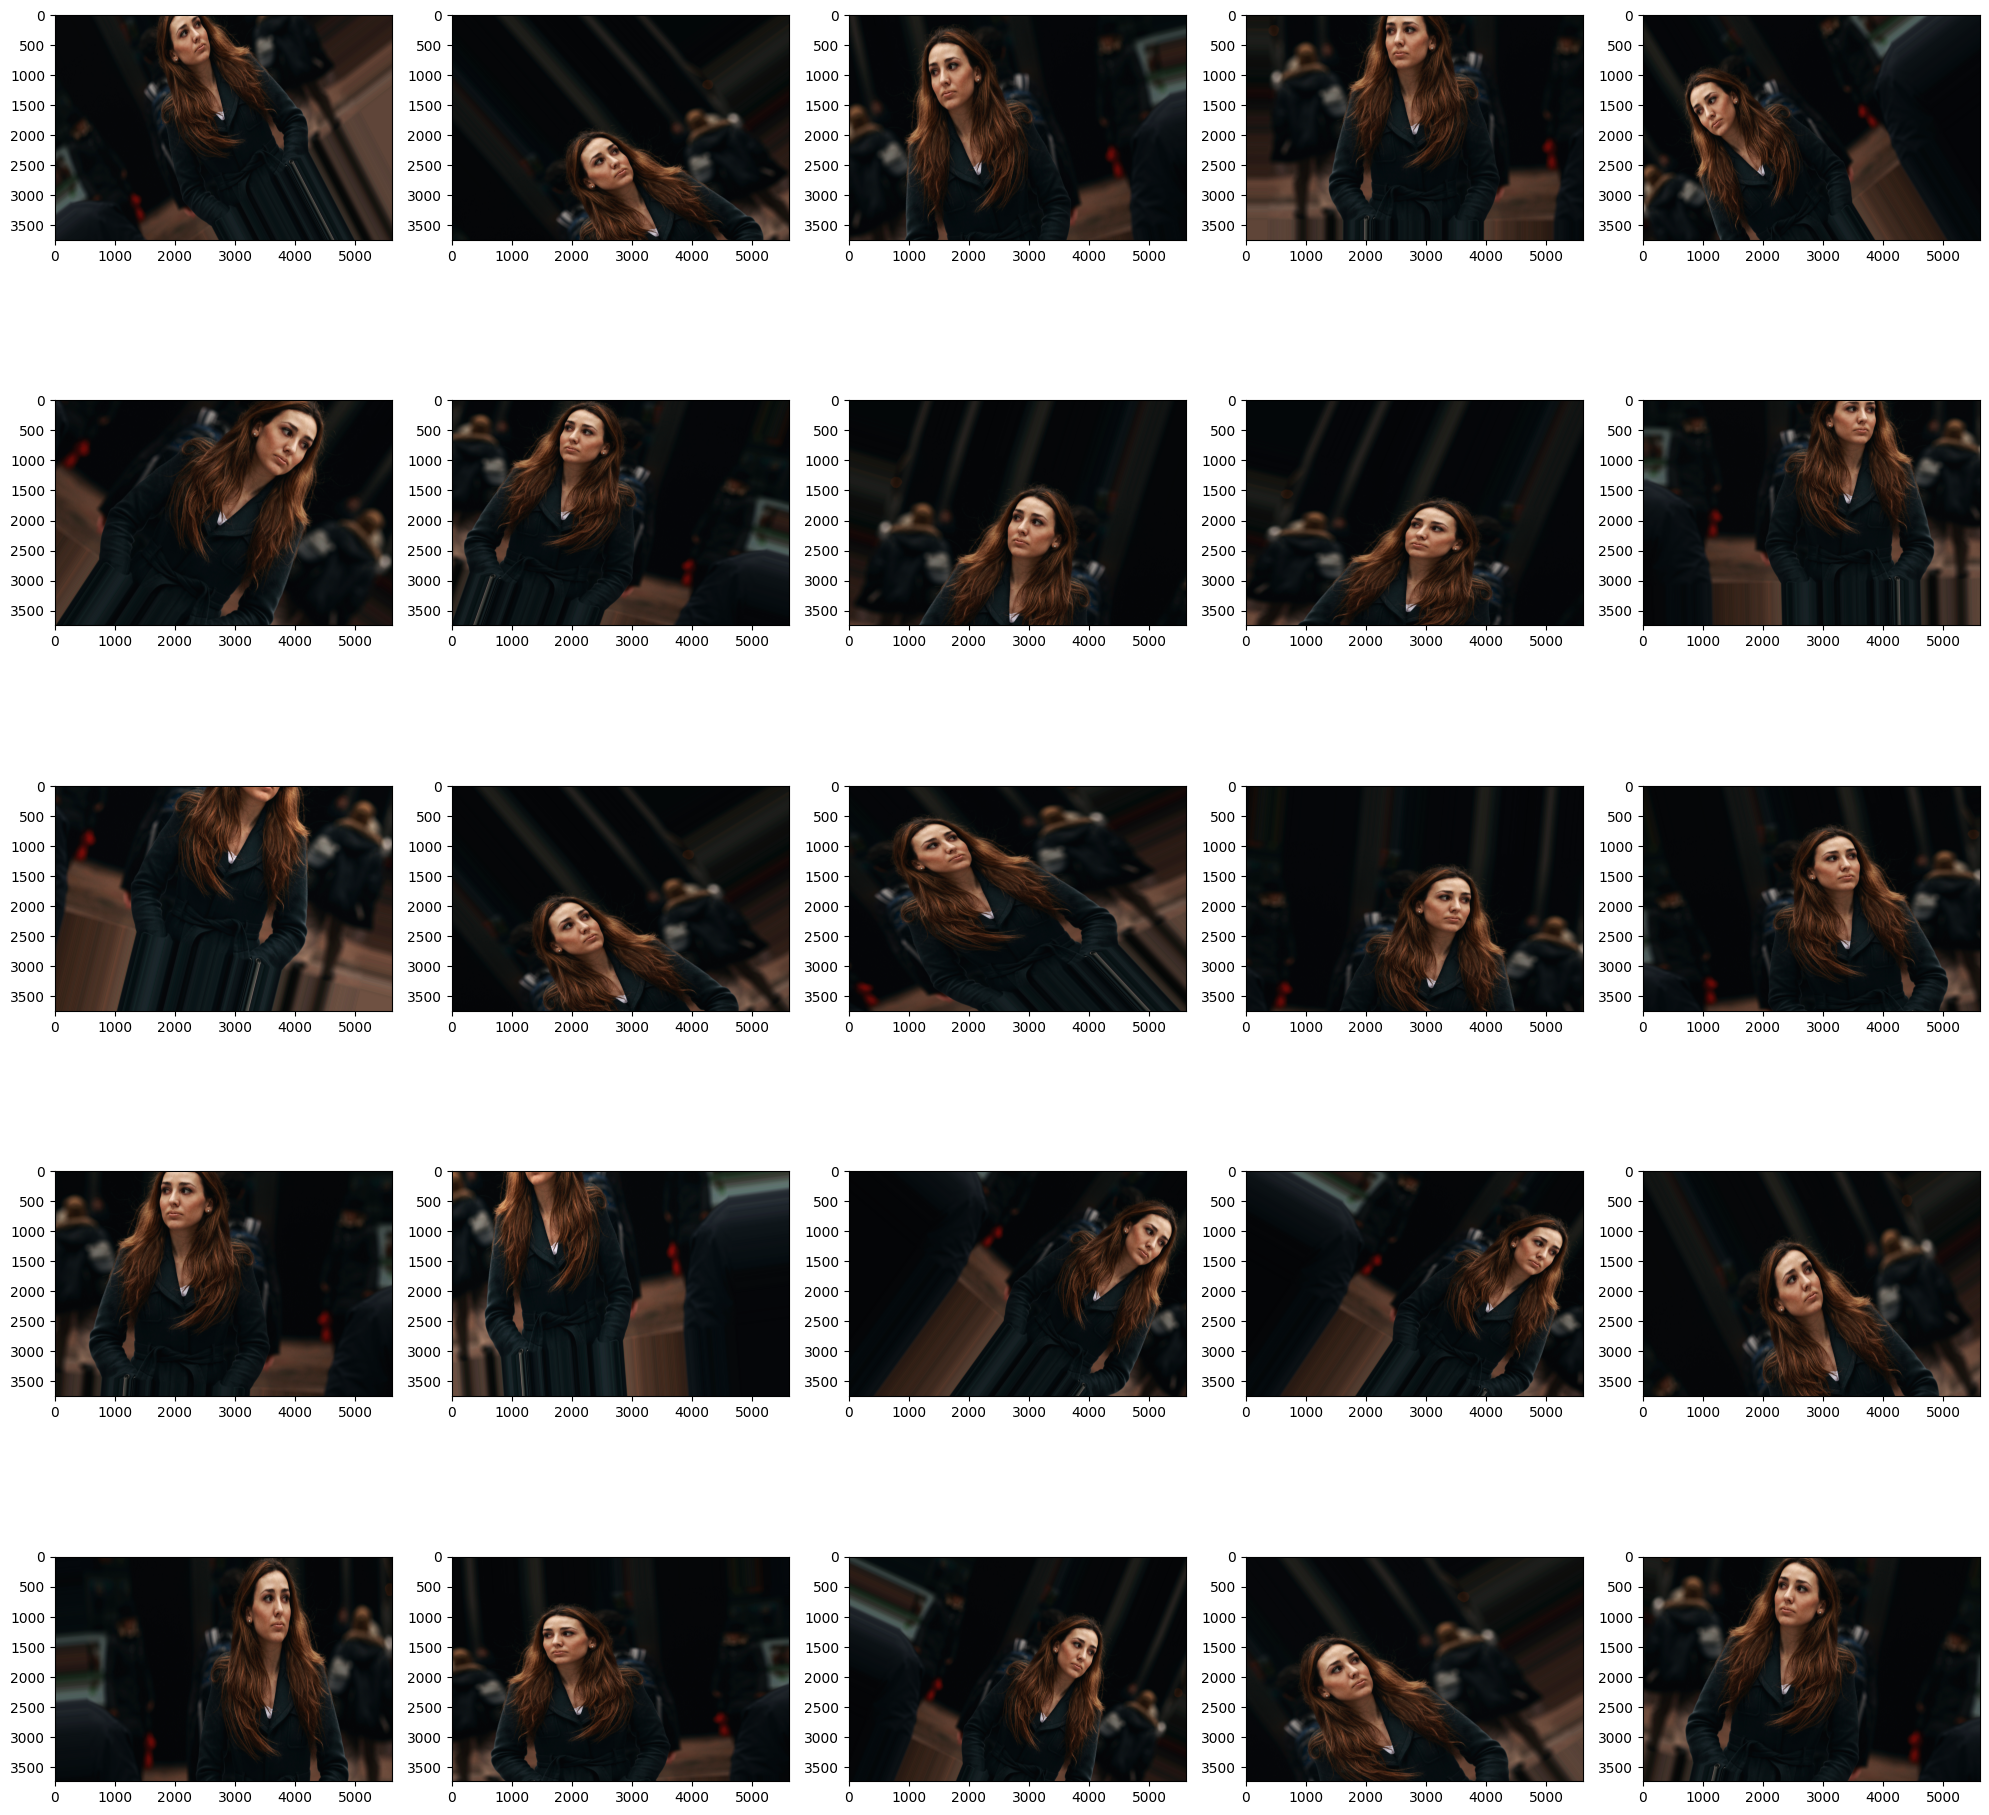

In [31]:
# 증강된 이미지를 시각적으로 확인하기 위한 설정
fig, ax = plt.subplots(5, 5, figsize=(20, 20))
ax = ax.flatten()

i = 0
for batch in datagen.flow(x, batch_size=1):  # flow : x 이미지 데이터로부터 배치 생성, 데이터 변형(transform) 수행
    ax[i].imshow(array_to_img(batch[0]))  # array_to_img: array 형태의 이미지 데이터를 PIL 이미지 객체로 변환
    i += 1
    if i == 25:
        break

plt.tight_layout()
plt.show()